K-Means Customer Segmentation Project

Benjamin Grech

Mall Manager wants to gather insights about their customers. Wishes to build a model to cluster the customers in order to make more informed business decisions


In [61]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Data Collection and Analysis
customer_data = pd.read_csv('C:\Jupyter Testing\Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
customer_data.shape

(200, 5)

In [51]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


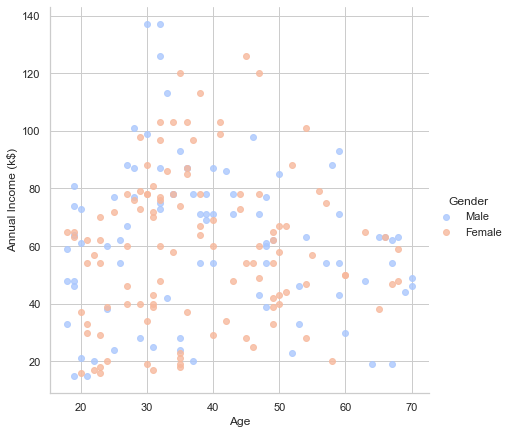

In [62]:
sns.set_style('whitegrid')
sns.lmplot('Age','Annual Income (k$)',data=customer_data, hue = 'Gender',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

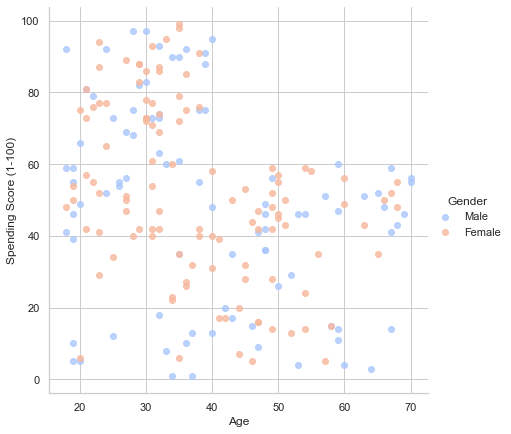

In [63]:
sns.set_style('whitegrid')
sns.lmplot('Age','Spending Score (1-100)',data=customer_data, hue = 'Gender',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

Plot 1: No obvious relationship between Income and spending score.
Plot 2: Can be seen that younger people from 20-40 have a significantly higher spending score than individuals from ages 40-70. 

Appears that for individuals with spending score less than 20, they are predominately males. Similarly, appears that females from all ages tend to have a spending score from 20-40 in comparison to Males.
Other than that, equal distribution of Males and Females  from spending score 40 and above

In [50]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values. Can proceed with data cleaning


In [ ]:
# K - Means Clustering Algorithm 

In [60]:
# Choosing to investigate annual income and spending score column
x = customer_data.iloc[:,[3,4]].values

Determining K - Optimal number of clusters

WCSS -> Within Clusters Sum of Squares

In [30]:
# Finding WCSS Value 
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=101)
    kmeans.fit(x)
        
    wcss.append(kmeans.inertia_)

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


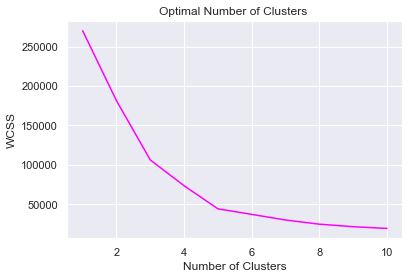

In [42]:
# Elbow Graph - To determine elbow point in which the value does not drop significantly 
sns.set()
plt.plot(range(1,11), wcss,color = 'magenta')
plt.title('Optimal Number of Clusters ')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the above plot, the believed optimal number of clusters should be 5

In [37]:
# Training the K-Means clustering Model
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


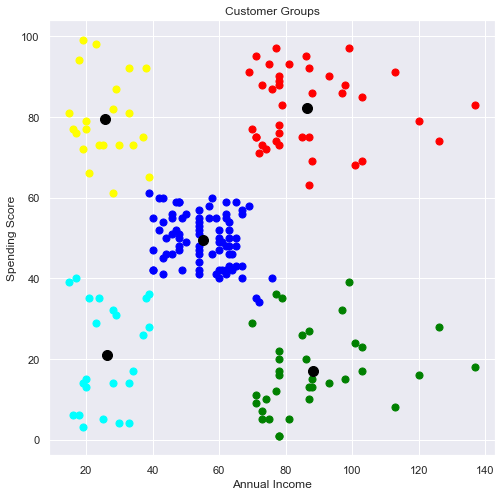

In [41]:
# Plotting the above cluster model and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s = 50, c = 'green', label = 'Cluster 1' )
plt.scatter(x[y==1,0], x[y==1,1], s = 50, c = 'blue', label ='Cluster 2' )
plt.scatter(x[y==2,0], x[y==2,1], s = 50, c = 'red', label = 'Cluster 3' )
plt.scatter(x[y==3,0], x[y==3,1], s = 50, c = 'yellow', label = 'Cluster 4' )
plt.scatter(x[y==4,0], x[y==4,1], s = 50, c = 'cyan', label = 'Cluster 5' )

#Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Conclusion 

Cyan - Individuals with lower annual income having are more cautious with their spending and therefore have a low spending score. 
Blue - Large amount of individuals who fall within the "average" income being between 40-80k annually having a spending score which is not too high but not too low. These people appear to be more flexibile with what they purchase in such mall
Green - Individuals with higher annual income but are quite conservative with their spending.
Red - Higher income indivuals (ranging from 80k to 140k) having the highest spending score. Can be shown in correlatin matrix as high average income does infact impact the amount they spend.